In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score, mean_absolute_percentage_error
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn import neighbors

In [ ]:
#Import dataset
df = pd.read_csv('/content/META.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,116.029999,117.839996,115.510002,116.860001,116.860001,20663900
1,2017-01-04,117.550003,119.660004,117.290001,118.690002,118.690002,19630900
2,2017-01-05,118.860001,120.949997,118.320000,120.669998,120.669998,19492200
3,2017-01-06,120.980003,123.879997,120.029999,123.410004,123.410004,28545300
4,2017-01-09,123.550003,125.430000,123.040001,124.900002,124.900002,22880400


In [ ]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)
print("val_data: ", val_data.shape)

train_data:  (1130, 1)
test_data:  (323, 1)
val_data:  (162, 1)


In [ ]:
# 3. Quá trình Training
X_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])

# Train the linear regression model
neighbor = neighbors.KNeighborsRegressor(n_neighbors = 100)
neighbor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=100)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# 4. Quá trình testing
X_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = neighbor.predict(X_test)

# 5. Quá trình Validate
X_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  neighbor.predict(X_val)

In [ ]:
# 6. Quá trình tạo index predict 10 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+10, step=1)

# Create an array of 10 consecutive integers starting from last_index
x_next_10_days = np.array(range(last_index+1, last_index+11)).reshape(-1, 1)

# Predict the closing prices for the next 10 days
y_next_10_days = neighbor.predict(x_next_10_days)

# Print the predicted closing prices for the next 10 days
print('Predicted closing prices for the next 10 days:')
print(y_next_10_days)

Predicted closing prices for the next 10 days:
[301.98059974 301.98059974 301.98059974 301.98059974 301.98059974
 301.98059974 301.98059974 301.98059974 301.98059974 301.98059974]


In [ ]:
from math import sqrt
MAPE = mean_absolute_percentage_error(y_test, y_pred)
RMSE = sqrt(mean_squared_error(y_test,y_pred))
MSE = mean_squared_error(y_test,y_pred)

Accuracy = 1 - MAPE

print('---------------------')
print("Test RMSE:", RMSE)
print("Test MSE:", MSE)
print("Test MAPE:", MAPE)
print('---------------------')
print("Test Accuracy:", Accuracy)

---------------------
Test RMSE: 93.49908389941233
Test MSE: 8742.078690029344
Test MAPE: 0.41497652877951136
---------------------
Test Accuracy: 0.5850234712204887


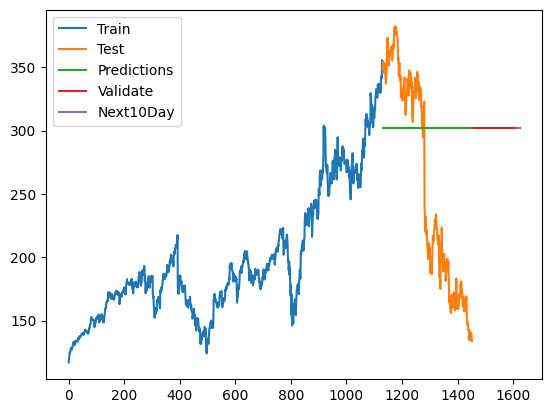

In [ ]:
#Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_10_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next10Day'])
plt.show()